In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from hazm import Normalizer

In [59]:
df = pd.read_csv(r'../data/sales.csv')

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10936\300903533.py:1: DtypeWarning: Columns (5,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/sales.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,address_no_digits,region,latitude,longitude,Gold,facility_count,بخاری,heating,extrahouse,welfare
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,...,ارمغان,11.0,36.347262,59.466991,583900.0,8,1,0,1,2
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,...,هاشمیه,9.0,36.307539,59.501074,583900.0,12,0,1,3,2
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,...,حسابی جنوبی,10.0,36.349646,59.495644,583900.0,8,0,0,3,0
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,...,کوثر شمالی,9.0,36.309638,59.510348,583900.0,10,1,0,3,2
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,...,حسابی شمالی,10.0,36.362017,59.504458,583900.0,17,0,1,3,3


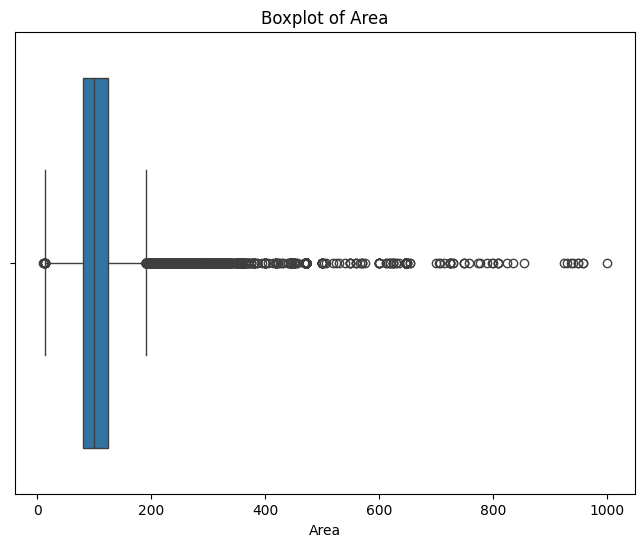

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['area'])
plt.title('Boxplot of Area')
plt.xlabel('Area')
plt.show()


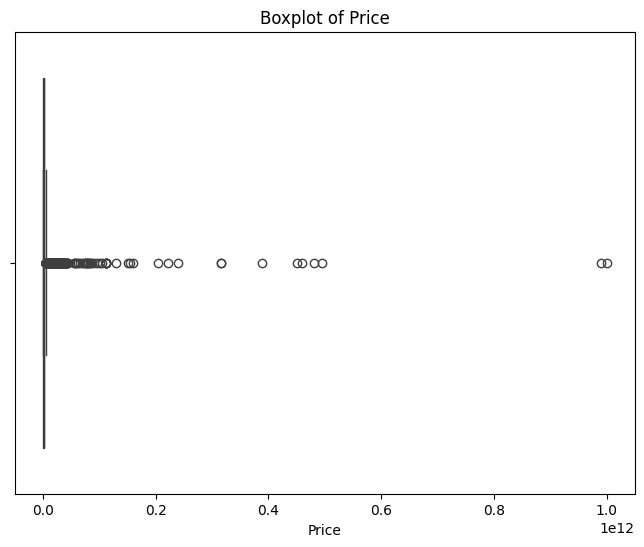

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


In [4]:
df.shape

(184729, 33)

In [5]:
df['facilities'] = df['facilities'].str.replace("'", "", regex=False)
df['facility_count'] = df['facilities'].apply(lambda x: len(str(x).split(',')))


In [6]:

from collections import Counter

# Flatten all facilities into a single list
all_facilities = df['facilities'].dropna().str.split(',').sum()
normalizer = Normalizer()

normalized_features = [normalizer.normalize(feature) for feature in all_facilities]
# Count the frequency of each facility
facility_frequency = Counter(normalized_features)

# Convert to a DataFrame for easier visualization
facility_frequency_df = pd.DataFrame(facility_frequency.items(), columns=['Facility', 'Frequency'])

# Sort by frequency (optional)
facility_frequency_df = facility_frequency_df.sort_values(by='Frequency', ascending=False)

In [6]:
normalizer = Normalizer()

# Ensure all entries in 'facilities' are strings and handle missing values
df["facilities"] = df["facilities"].fillna("").astype(str)

# Normalize each facility and split by commas
df["facilities"] = df["facilities"].apply(
    lambda x: ",".join([normalizer.normalize(item.strip()) for item in x.split(",")])
)

# List of facilities for which you want to create columns
selected_facilities = [
    "پارکینگ", "انباری", "پکیج", "آسانسور", "بخاری", 
    "شوفاژ", "تراس", "کمد دیواری", "هود", 
    "گاز روکار", "درب ضدسرقت", "حمام مستر", "گرما از کف"
]

# Add a column for each selected facility
for facility in selected_facilities:
    df[facility] = df["facilities"].apply(lambda x: 1 if facility in x else 0)

In [7]:
df.columns

Index(['link', 'type', 'date', 'address', 'area', 'infrastructure',
       'floors_sum', 'homes_num', 'floor_num', 'rooms', 'property_direction',
       'view', 'flooring', 'wall', 'cabinet', 'cooler', 'water', 'electricity',
       'gas', 'age', 'elevator', 'parking', 'desc', 'price', 'mortgage',
       'rent', 'facilities', 'Dollar', 'address_no_digits', 'region',
       'latitude', 'longitude', 'Gold', 'facility_count', 'پارکینگ', 'انباری',
       'پکیج', 'آسانسور', 'بخاری', 'شوفاژ', 'تراس', 'کمد دیواری', 'هود',
       'گاز روکار', 'درب ضدسرقت', 'حمام مستر', 'گرما از کف'],
      dtype='object')

In [8]:
df.shape

(184729, 47)

In [9]:
df.loc[df['پارکینگ']==1,'parking'] =1
df.loc[df['آسانسور']==1,'elevator'] =1

df['parking'].replace({'دارد':1,'ندارد':0},inplace=True)
df['elevator'].replace({'دارد':1,'ندارد':0},inplace=True)


df['heating'] = 0  
df.loc[(df['شوفاژ'] == 1) | (df['پکیج'] == 1) | (df['گرما از کف'] == 1), 'heating'] = 1

df['extrahouse'] = 0  
df.loc[(df['تراس'] == 1) & (df['انباری'] == 1), 'extrahouse'] = 3
df.loc[(df['تراس'] == 0) & (df['انباری'] == 0), 'extrahouse'] = 0
df.loc[(df['تراس'] == 0) & (df['انباری'] == 1), 'extrahouse'] = 2
df.loc[(df['تراس'] == 1) & (df['انباری'] == 0), 'extrahouse'] = 1


df['welfare'] = df['هود'] + df['کمد دیواری'] + df['حمام مستر'] + df['گاز روکار'] + df['درب ضدسرقت'] 

df.drop([
    "پارکینگ", "انباری", "پکیج", "آسانسور", 
    "شوفاژ", "تراس", "کمد دیواری", "هود", 
    "گاز روکار", "درب ضدسرقت", "حمام مستر", "گرما از کف"
],axis=1,inplace=True)



## fix the price column

In [ ]:
# 1-replace the unrealistic data with nan

df.loc[df['price']<100000000,'price'] = np.nan

In [25]:
print(df['price'].describe())

count    1.082960e+05
mean     2.050945e+09
std      6.159884e+09
min      1.000000e+08
25%      7.500000e+08
50%      1.312500e+09
75%      2.475000e+09
max      1.000000e+12
Name: price, dtype: float64


In [20]:
df['price'].isna().sum()

42946

In [ ]:
df['parking'].replace({'دارد':1,'ندارد':0},inplace=True)
df['elevator'].replace({'دارد':1,'ندارد':0},inplace=True)

In [12]:
# 2-find the most realted features to fill the missing values
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,area,floors_sum,homes_num,floor_num,rooms,age,elevator,parking,price,Dollar,region,latitude,longitude,Gold,facility_count,بخاری,heating,extrahouse,welfare
area,1.000000,0.214587,-0.010046,0.121053,0.548702,-0.172083,0.287474,0.249003,0.150791,-0.038455,-0.012356,-0.006938,0.002138,-0.036737,0.204347,-0.240275,0.275596,0.164859,0.129762
floors_sum,0.214587,1.000000,0.477954,0.481671,0.303255,-0.412024,0.543362,0.270837,0.084976,-0.057871,0.078686,0.012603,0.002807,-0.047357,0.304479,-0.267688,0.382660,0.236887,0.190139
homes_num,-0.010046,0.477954,1.000000,0.159461,0.067856,-0.104533,0.282121,0.244679,-0.039492,-0.161764,0.237020,0.034899,-0.005948,-0.145344,0.306389,-0.033179,0.272617,0.244553,0.131191
floor_num,0.121053,0.481671,0.159461,1.000000,0.198737,-0.183244,0.253184,0.172289,0.049564,0.020624,0.035430,0.006866,0.001480,0.022660,0.113525,-0.145970,0.137582,0.115673,0.077665
rooms,0.548702,0.303255,0.067856,0.198737,1.000000,-0.182288,0.381773,0.414424,0.157973,-0.033384,0.078394,-0.005701,-0.008311,-0.027230,0.291901,-0.297579,0.349500,0.255541,0.189787
age,-0.172083,-0.412024,-0.104533,-0.183244,-0.182288,1.000000,-0.550103,0.014479,-0.052315,0.022683,-0.042850,-0.017055,-0.006846,0.020069,-0.132011,0.378883,-0.335924,-0.057962,-0.124902
elevator,0.287474,0.543362,0.282121,0.253184,0.381773,-0.550103,1.000000,0.363673,0.119025,0.020407,0.103690,0.019277,0.006388,0.023315,0.277623,-0.509982,0.477226,0.171823,0.160276
parking,0.249003,0.270837,0.244679,0.172289,0.414424,0.014479,0.363673,1.000000,0.087423,-0.084912,0.229179,0.012965,-0.013742,-0.077169,0.338662,-0.242793,0.313707,0.296703,0.122687
price,0.150791,0.084976,-0.039492,0.049564,0.157973,-0.052315,0.119025,0.087423,1.000000,0.199323,-0.012611,0.000761,0.010074,0.195534,0.006758,-0.138652,0.050653,0.013433,0.102453
Dollar,-0.038455,-0.057871,-0.161764,0.020624,-0.033384,0.022683,0.020407,-0.084912,0.199323,1.000000,-0.071233,0.034022,0.043728,0.979308,-0.358210,-0.252601,-0.236966,-0.247596,0.189595


### fit regression to predict missing price

In [15]:
df.isna().sum()

link                       0
type                       0
date                       0
address                   16
area                       0
infrastructure         30071
floors_sum              1816
homes_num              10178
floor_num                341
rooms                      0
property_direction     12443
view                       0
flooring                8085
wall                       0
cabinet                45002
cooler                  9795
water                      0
electricity                0
gas                     1344
age                     1712
elevator                   0
parking                    0
desc                   11843
price                  42946
mortgage              133637
rent                  133637
facilities                 0
Dollar                     0
address_no_digits         17
region                    17
latitude               12970
longitude              12970
Gold                    7311
facility_count             0
بخاری         

In [ ]:
# cleaner cell
def fillna_mode(group):
    
    mode = group.mode().iloc[0] if not group.mode().empty else None
    print(mode)
    return group.fillna(mode)

df.dropna(subset=['region'],inplace=True)
df.drop(['infrastructure'],axis=1,inplace=True)

df['floors_sum'] = df['floors_sum'].fillna(
    df.groupby('region')['floors_sum'].transform('mean')
)
df['homes_num'] = df['homes_num'].fillna(
    df.groupby('region')['homes_num'].transform('mean')
)
df['floor_num'] = df['floor_num'].fillna(
    df.groupby('region')['floor_num'].transform('mean')
)

df['flooring'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['flooring'] = df.groupby('region')['flooring'].transform(fillna_mode)
df['flooring'] = df['flooring'].apply(lambda x: 1 if x == 'سرامیک' else 0)

df['property_direction'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['property_direction'] = df.groupby('region')['property_direction'].transform(fillna_mode)
df['property_direction'] = df['property_direction'].apply(lambda x: 1 if x == 'جنوبی' else (2 if x == 'شمالی' else 0))

df['cabinet'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['cabinet'] = df.groupby('region')['cabinet'].transform(fillna_mode)

df['cooler'].replace({'کولر آبی':'آبی','کولر گازی':'گازی','آبی و گازی':'اسپلیت','داکت اسپلیت':'اسپلیت','فن کوئل':'اسپلیت','-':np.NAN,"couldn't crawl":np.NAN,'کولر آب':'آبی'},inplace=True)
df['cooler'] = df['cooler'].astype(str)
df['cooler'] = df['cooler'].apply(
    lambda x: 'گازی' if 'کولر گازی' in x else (
        'آبی' if 'کولر آبی' in x else (
            'اسپیلت' if 'اسپیلت' in x else (
            'اسپیلت' if 'اسپلیت' in x else x
        )
        )
    )
)
df['cooler'] = df['cooler'].replace('nan', np.NAN)
df['cooler'] = df.groupby('region')['cooler'].transform(fillna_mode)
df['cooler'] = df['cooler'].apply(lambda x: 1 if x == 'آبی' else (2 if x == 'گازی' else (3 if x == 'اسپیلت' else (0 if x == 'ندارد' else 0))))
df['gas'] = df['gas'].apply(lambda x: 1 if x == 'مستقل' else 0)
df['water'] = df['water'].apply(lambda x: 1 if x == 'مستقل' else 0)
df['electricity'] = df['electricity'].apply(lambda x: 1 if x == 'مستقل' else 0)
df['wall'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['wall'] = df.groupby('region')['wall'].transform(fillna_mode)
df['wall'] = df['wall'].apply(lambda x: 1 if x == 'نقاشی' else (2 if x == 'کاغذ دیواری' else 0))

In [16]:
df.describe()

,area,floors_sum,homes_num,floor_num,rooms,age,elevator,parking,price,Dollar,region,latitude,longitude,Gold,facility_count,بخاری,heating,extrahouse,welfare
count,184729.00000,182913.000000,174551.000000,184388.000000,184729.000000,183017.000000,184729.000000,184729.000000,1.417830e+05,184729.000000,184712.000000,171759.000000,171759.000000,1.774180e+05,184729.000000,184729.000000,184729.000000,184729.000000,184729.000000
mean,108.36592,3.984796,6.879651,2.471484,2.093905,8.541086,0.499212,0.770686,2.271885e+09,39292.254102,7.606371,36.322795,59.503114,2.547582e+06,5.797038,0.366699,0.387167,1.445052,0.720190
std,45.18406,1.509705,4.532748,1.559619,0.638338,6.820244,0.500001,0.420393,5.974750e+09,17015.594908,3.895648,0.201052,0.504340,1.412659e+06,3.656557,0.481905,0.487104,1.222963,1.346807
min,10.00000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,11085.000000,1.000000,29.630344,49.682874,5.242000e+05,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.00000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,1.000000,8.100000e+08,24946.000000,2.000000,36.310935,59.487701,1.432900e+06,2.000000,0.000000,0.000000,0.000000,0.000000
50%,100.00000,4.000000,6.000000,2.000000,2.000000,8.000000,0.000000,1.000000,1.500000e+09,43585.000000,9.000000,36.332459,59.518595,2.103000e+06,6.000000,0.000000,0.000000,2.000000,0.000000
75%,124.00000,5.000000,9.000000,3.000000,2.000000,14.000000,1.000000,1.000000,2.800000e+09,53651.000000,10.000000,36.351709,59.570706,3.459600e+06,8.000000,1.000000,1.000000,2.000000,1.000000
max,1000.00000,10.000000,20.000000,10.000000,5.000000,29.000000,1.000000,1.000000,1.000000e+12,69480.000000,13.000000,37.475114,70.118840,6.334300e+06,24.000000,1.000000,1.000000,3.000000,5.000000


In [81]:
df['desc'].value_counts(dropna=False)

desc
شش دانگ ملک                                             51679
شش دانگ                                                 26917
قولنامه                                                 23208
شش دانگ آستانه                                          18313
تک‌برگ                                                  14415
وکالتی                                                  12510
NaN                                                     11843
قول‌نامه‌ای                                              8129
قولنامه وکالتی                                           5218
شش دانگ اوقافی                                           4217
couldn't crawl                                           3283
سایر                                                     2168
منگوله‌دار                                               1028
ملک                                                       859
آستانه                                                    367
شش دانگ وکالتی                                            182
سه 

In [79]:
# def fillna_mode(group):
    
#     mode = group.mode().iloc[0] if not group.mode().empty else None
#     print(mode)
#     return group.fillna(mode)

df['wall'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df.groupby('region')['wall'].transform(fillna_mode)

کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
نقاشی
کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
کاغذ دیواری
نقاشی


0          کاغذ دیواری
1          کاغذ دیواری
2                  گچی
3                نقاشی
4          کاغذ دیواری
              ...     
184724           نقاشی
184725    نقاشی و کاغذ
184726     کاغذ دیواری
184727    نقاشی و کاغذ
184728           نقاشی
Name: wall, Length: 184729, dtype: object